Training Model

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_csv('final_dataset.csv')

In [115]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,L56106,M,297.3,308.3,1459,59.6,207,1,Power Failure,...,745.661610,-0.495356,1.226757,1,-0.958182,-1.359025,0.216281,0.349232,0.490231,0.626185
1,2,L54029,L,301.1,311.3,1498,37.6,11,0,No Failure,...,4529.506118,-0.765092,0.566438,1,0.126183,-1.316756,-0.022594,0.038504,0.132819,-0.248127
2,3,L53258,L,300.8,310.7,1339,59.1,203,1,Overstrain Failure,...,4019.410836,0.883543,-1.085240,0,-0.954949,-0.086424,-0.835961,0.048053,-0.205369,-0.468898
3,4,L50530,L,301.4,310.8,1285,62.6,183,1,Overstrain Failure,...,389.362128,1.639595,-0.944613,0,-1.230266,0.206654,-0.856195,0.279195,-0.258806,-0.007033
4,5,L51841,L,303.3,311.3,1350,48.1,32,1,Heat Dissipation Failure,...,1639.657411,0.697170,-1.603008,0,0.022523,1.466719,0.595474,0.236426,0.012031,-0.409779


In [116]:
df.shape

(1392, 21)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      1392 non-null   int64  
 1   Product ID               1392 non-null   object 
 2   Type                     1392 non-null   object 
 3   Air temperature [K]      1392 non-null   float64
 4   Process temperature [K]  1392 non-null   float64
 5   Rotational speed [rpm]   1392 non-null   int64  
 6   Torque [Nm]              1392 non-null   float64
 7   Tool wear [min]          1392 non-null   int64  
 8   Target                   1392 non-null   int64  
 9   Failure Type             1392 non-null   object 
 10  operational_hours        1392 non-null   int64  
 11  RUL                      1392 non-null   float64
 12  Vibration (mm/s)         1392 non-null   float64
 13  Pressure (Pa)            1392 non-null   float64
 14  Maintenance Required    

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,1392.0,696.500000,401.980099,1.000000,348.750000,696.500000,1044.250000,1392.000000
Air temperature [K],1392.0,300.487069,2.021710,295.600000,298.775000,300.600000,302.225000,304.400000
Process temperature [K],1392.0,310.226437,1.423988,306.100000,309.100000,310.350000,311.200000,313.700000
Rotational speed [rpm],1392.0,1512.379310,288.157507,1181.000000,1356.000000,1426.500000,1564.000000,2886.000000
Torque [Nm],1392.0,45.056322,14.170205,3.800000,36.425000,46.100000,54.925000,76.600000
Tool wear [min],1392.0,123.829023,70.589167,0.000000,64.000000,127.000000,192.000000,253.000000
Target,1392.0,0.474138,0.499510,0.000000,0.000000,0.000000,1.000000,1.000000
operational_hours,1392.0,2618.890805,1406.409990,118.000000,1392.000000,2665.000000,3835.000000,4995.000000
RUL,1392.0,2342.113825,1407.016789,-24.848123,1112.224743,2289.584036,3569.338725,4841.729779
Vibration (mm/s),1392.0,0.021720,1.015854,-1.729951,-0.860757,0.038385,0.865448,1.731966


In [119]:
df.describe(include= 'object')

,Product ID,Type,Failure Type
count,1392,1392,1392
unique,696,3,6
top,L56106,L,No Failure
freq,2,884,696


In [120]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
operational_hours          0
RUL                        0
Vibration (mm/s)           0
Pressure (Pa)              0
Maintenance Required       0
Temp_Change                0
Vib_Change                 0
Temperature_Mean           0
Vibration_Mean             0
Pressure_Mean              0
RPM_Mean                   0
dtype: int64

In [121]:
df.duplicated().sum()

0

In [122]:
# Filtering Categorical Calumns
cat_cols= df.select_dtypes(include= 'O').columns.tolist()

In [123]:
# Print Categorical Columns
cat_cols

['Product ID', 'Type', 'Failure Type']

In [124]:
# value counts for categorical columns
for col in cat_cols:
    print(df[col].value_counts())

Product ID
L56106    2
L52250    2
M15740    2
H29997    2
L52299    2
         ..
L49732    2
L54744    2
L50894    2
L56394    2
L52236    2
Name: count, Length: 696, dtype: int64
Type
L    884
M    392
H    116
Name: count, dtype: int64
Failure Type
No Failure                  696
Heat Dissipation Failure    224
Power Failure               190
Overstrain Failure          156
Tool Wear Failure            90
Random Failures              36
Name: count, dtype: int64


In [125]:
df_f = df[df.Target==1]
df_f['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    224
Power Failure               190
Overstrain Failure          156
Tool Wear Failure            90
Name: count, dtype: int64

In [126]:
idx= df_f[df_f['Failure Type']== 'No Failure'].index
df.drop(idx, axis=0, inplace= True)

In [127]:
df_f = df[df.Target==0]
df_f['Failure Type'].value_counts()

Failure Type
No Failure         696
Random Failures     36
Name: count, dtype: int64

In [128]:
idx= df_f[df_f['Failure Type']== 'Random Failures'].index
df.drop(idx, axis=0, inplace= True)

In [129]:
# Shape Check
df.shape

(1356, 21)

In [130]:
num_cols= df.select_dtypes(exclude='O').columns.tolist()
num_cols

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'operational_hours',
 'RUL',
 'Vibration (mm/s)',
 'Pressure (Pa)',
 'Maintenance Required',
 'Temp_Change',
 'Vib_Change',
 'Temperature_Mean',
 'Vibration_Mean',
 'Pressure_Mean',
 'RPM_Mean']

DATA VISUALISATION

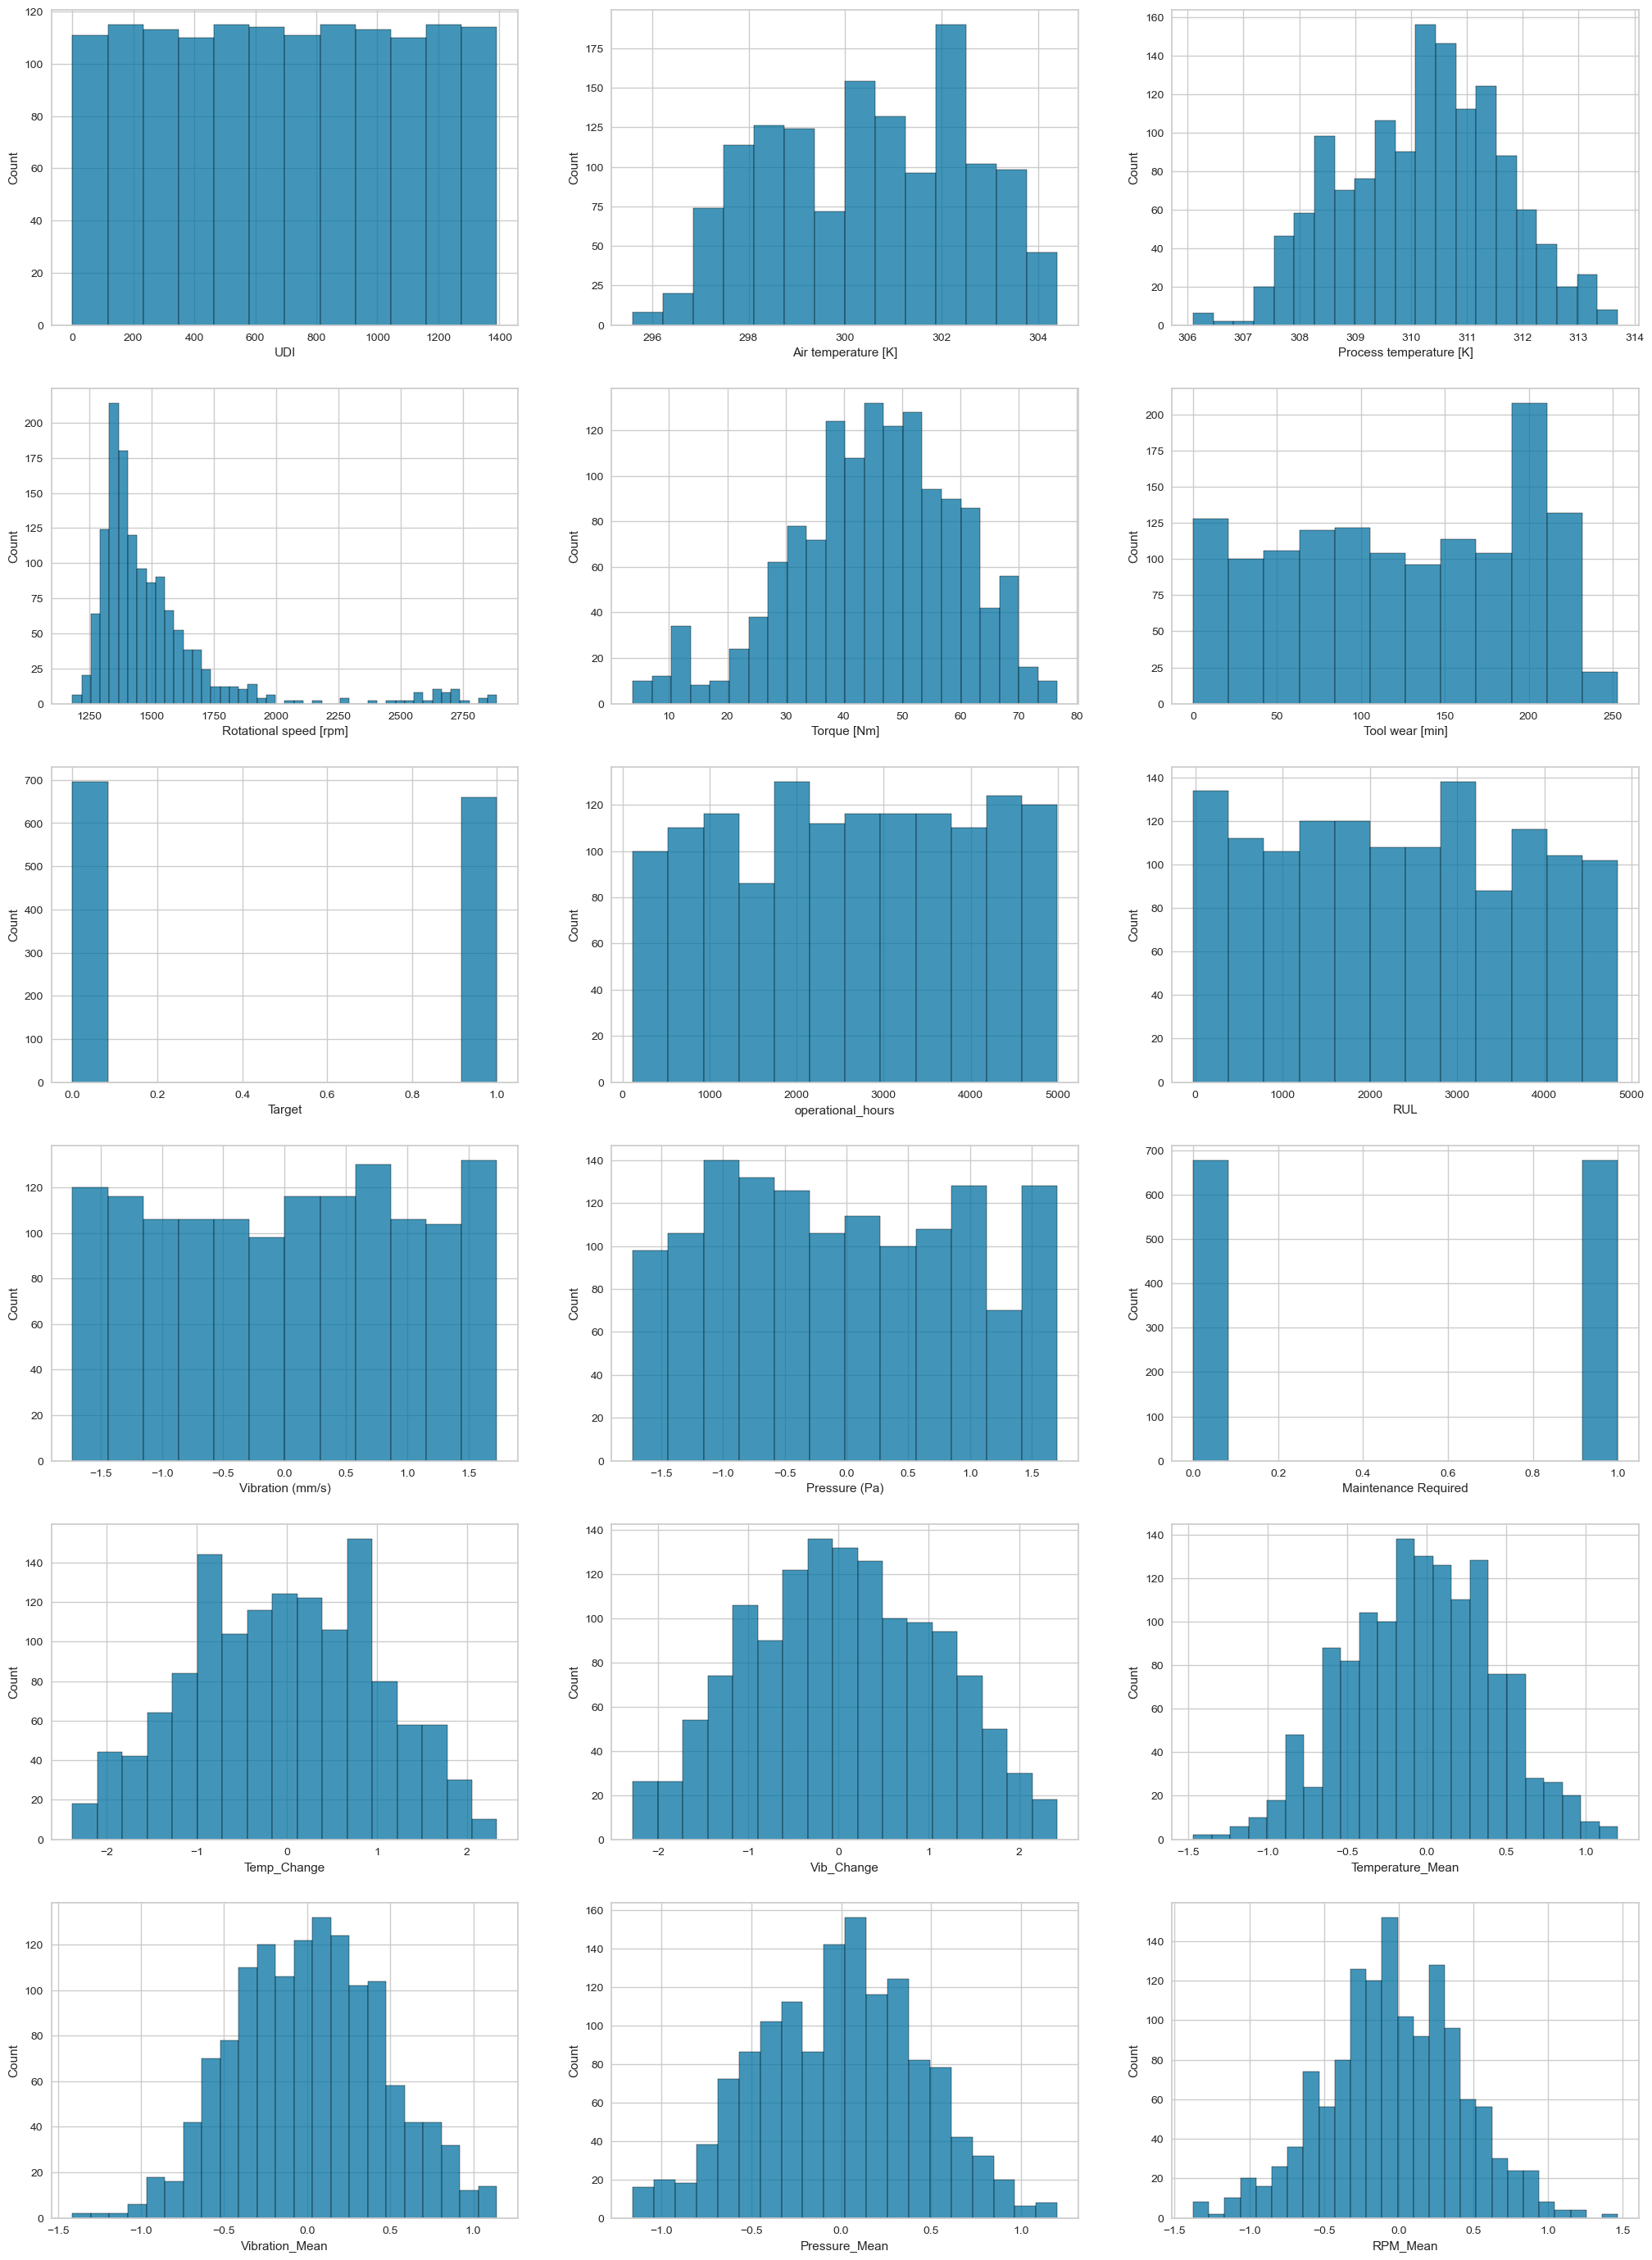

In [131]:
# Pair Plot
plt.figure(figsize= (25,35))

for i, col in  enumerate(num_cols, 1):
    plt.subplot(6,3,i)
    sns.histplot(data= df, x= col)
plt.show()

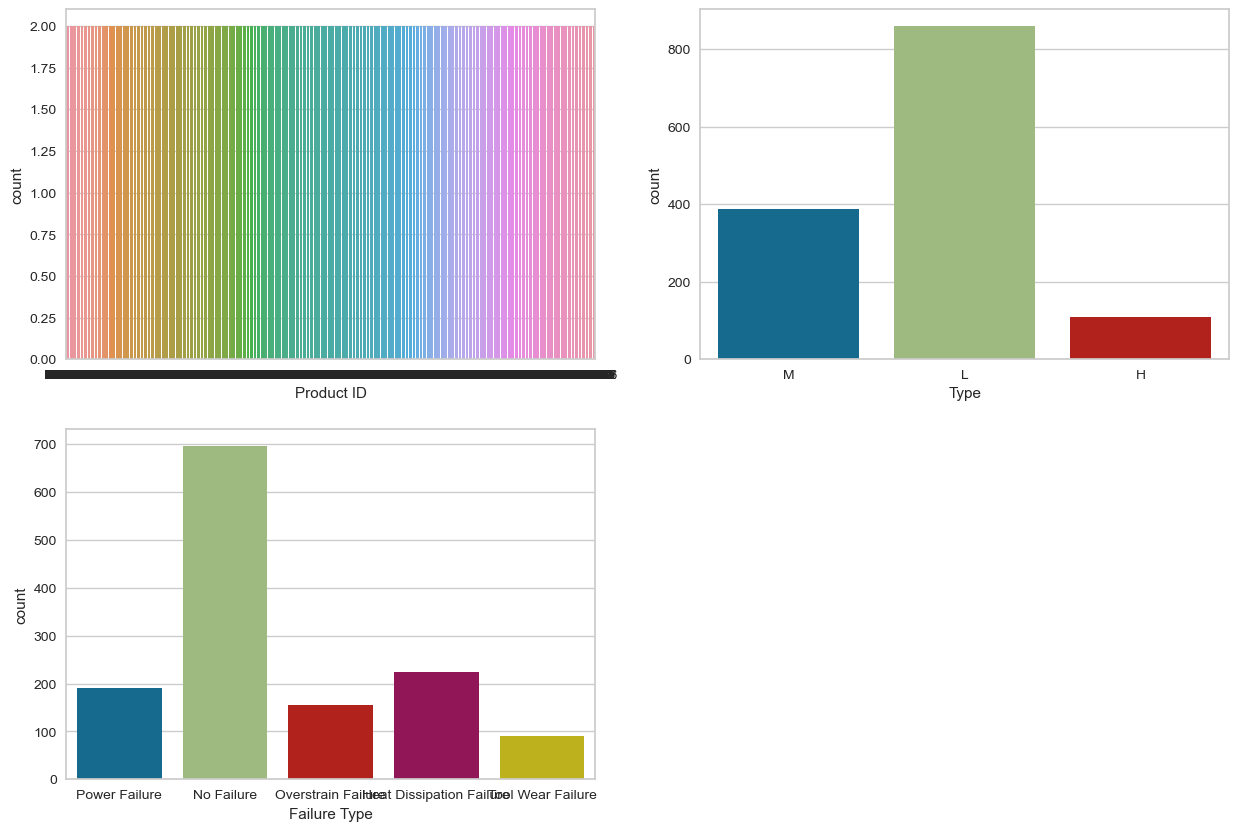

In [132]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data= df, x= col)
plt.show()

TRAINING MODEL

In [133]:
# Preparing data for model Training

x= df.drop(['Target', 'Failure Type'], axis= 1)
y= df['Target']

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
# Splitting Data Into Train and test
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [136]:
# Filtering the Categorical and Numerical Features for the Further Analysis and Operations
cat_cols= X_train.select_dtypes(include= "O").columns.tolist()
num_cols= X_train.select_dtypes(exclude= "O").columns.tolist()

In [137]:
cat_cols

['Product ID', 'Type']

In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [139]:
# Column Transformation For the Numerical and categorical features
enc= OneHotEncoder(handle_unknown= 'ignore')
sc= StandardScaler()

ct= ColumnTransformer(
        [
            ('encoding', enc, cat_cols),
            ('scaling', sc, num_cols)
        ]
)

In [140]:
X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)


Logistic Regression Model

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
# Fit the Modle on train data
clf= LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
y_pred= clf.predict(X_test)

In [144]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       144
           1       0.85      0.88      0.86       128

    accuracy                           0.87       272
   macro avg       0.87      0.87      0.87       272
weighted avg       0.87      0.87      0.87       272



In [146]:
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regession: ', Logistic)

Logistic Regession:  0.8713235294117647


In [147]:
confusion_matrix(y_test, y_pred)

array([[125,  19],
       [ 16, 112]], dtype=int64)

In [148]:
roc_auc_score(y_test, y_pred)

0.8715277777777778

Text(0, 0.5, 'True Positive Rate')

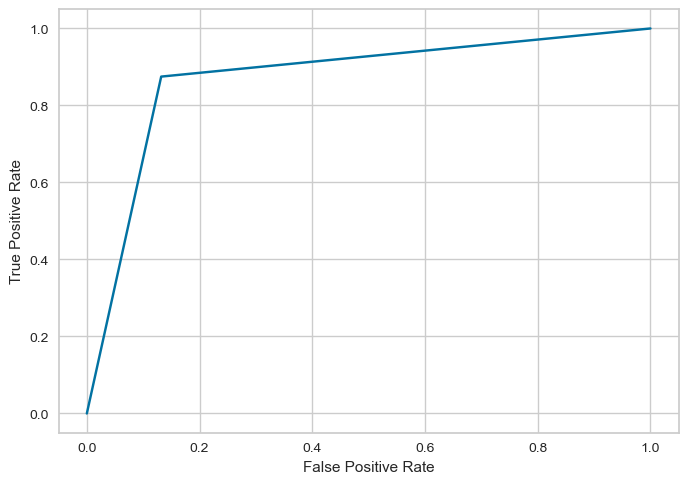

In [149]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [150]:
# Train data Analysis For Logistic Regression

In [151]:
y_pred_t= clf.predict(X_train)

In [152]:
print(classification_report(y_train, y_pred_t))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       552
           1       0.92      0.94      0.93       532

    accuracy                           0.93      1084
   macro avg       0.93      0.93      0.93      1084
weighted avg       0.93      0.93      0.93      1084



In [153]:
accuracy_score(y_train, y_pred_t)

0.9326568265682657

In [154]:
confusion_matrix(y_train,y_pred_t)

array([[510,  42],
       [ 31, 501]], dtype=int64)


Support Vector MAchines

In [155]:
from sklearn.svm import SVC

In [156]:
svm= SVC()

In [157]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [158]:
y_pred_svm= svm.predict(X_test)

In [159]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       144
           1       0.90      0.92      0.91       128

    accuracy                           0.92       272
   macro avg       0.91      0.92      0.92       272
weighted avg       0.92      0.92      0.92       272



In [160]:
SVM =accuracy_score(y_test, y_pred_svm)
print('SVM :', SVM)

SVM : 0.9154411764705882


In [161]:
confusion_matrix(y_test, y_pred_svm)

array([[131,  13],
       [ 10, 118]], dtype=int64)

In [162]:
roc_auc_score(y_test, y_pred_svm)

0.915798611111111

Text(0, 0.5, 'True Positive Rate')

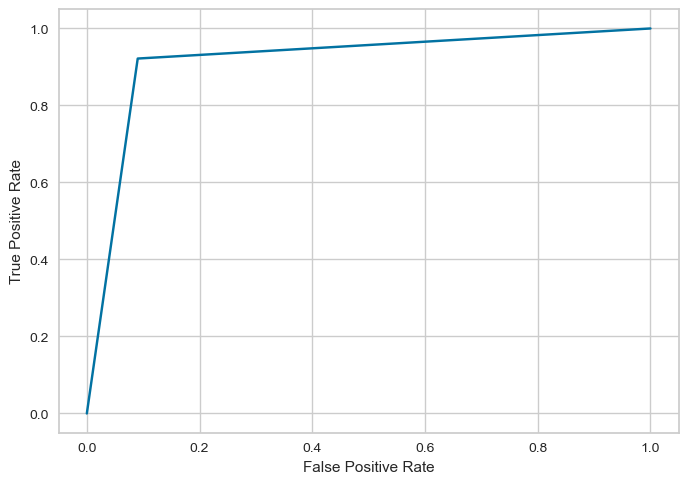

In [163]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_svm)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [164]:
# Train data

In [165]:
y_pred_svmt = svm.predict(X_train)

In [166]:
print(classification_report(y_train, y_pred_svmt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       552
           1       0.97      0.97      0.97       532

    accuracy                           0.97      1084
   macro avg       0.97      0.97      0.97      1084
weighted avg       0.97      0.97      0.97      1084



In [167]:
accuracy_score(y_train, y_pred_svmt)

0.9704797047970479

In [168]:
confusion_matrix(y_train, y_pred_svmt)

array([[535,  17],
       [ 15, 517]], dtype=int64)

In [169]:
roc_auc_score(y_train, y_pred_svmt)

0.97050370491446

Text(0, 0.5, 'True Positive Rate')

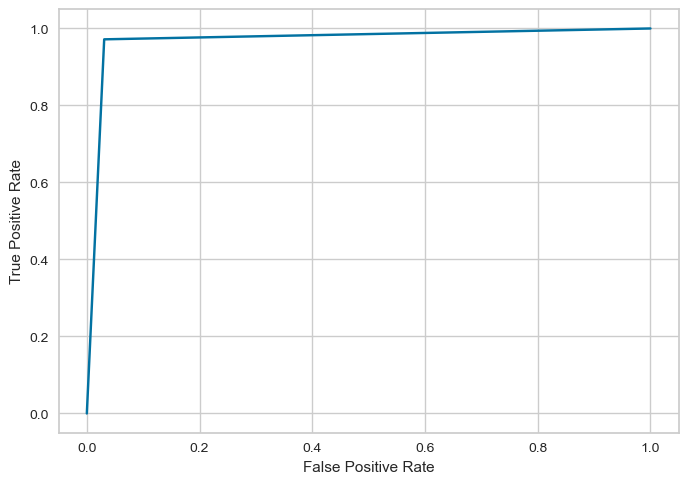

In [170]:
fpr, tpr, thresholds= roc_curve(y_train, y_pred_svmt)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


SVM Model with RBF Kernel

In [171]:
rbf= SVC(kernel= 'rbf')

In [172]:
rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [173]:
y_rbf = rbf.predict(X_test)

In [174]:
print(classification_report(y_test, y_rbf))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       144
           1       0.90      0.92      0.91       128

    accuracy                           0.92       272
   macro avg       0.91      0.92      0.92       272
weighted avg       0.92      0.92      0.92       272



In [175]:
svm_rbf= accuracy_score(y_test, y_rbf)
print('SVM Modle with RBF Kernel: ', svm_rbf)

SVM Modle with RBF Kernel:  0.9154411764705882


In [176]:
confusion_matrix(y_test, y_rbf)

array([[131,  13],
       [ 10, 118]], dtype=int64)

In [177]:
roc_auc_score(y_test, y_rbf)

0.915798611111111

Text(0, 0.5, 'True Positive Rate')

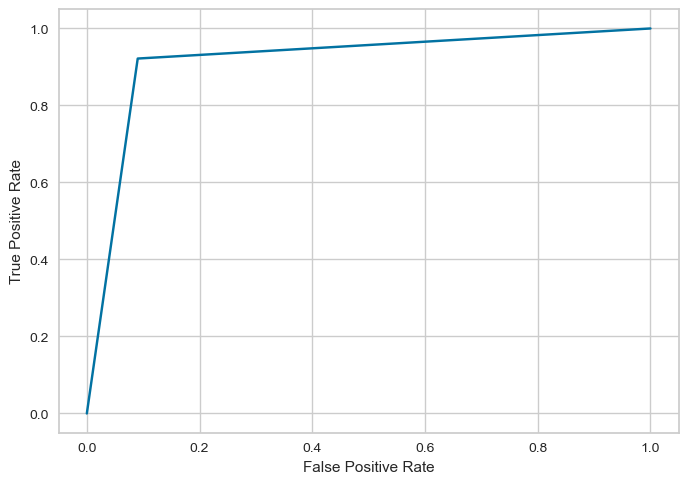

In [178]:
fpr, tpr, _ = roc_curve(y_test, y_rbf) 
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [179]:
y_rbft= rbf.predict(X_train)

In [180]:
print(classification_report(y_train, y_rbft))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       552
           1       0.97      0.97      0.97       532

    accuracy                           0.97      1084
   macro avg       0.97      0.97      0.97      1084
weighted avg       0.97      0.97      0.97      1084



In [181]:
accuracy_score(y_train, y_rbft)

0.9704797047970479

In [182]:
confusion_matrix(y_train, y_rbft)

array([[535,  17],
       [ 15, 517]], dtype=int64)

Text(0, 0.5, 'TPR')

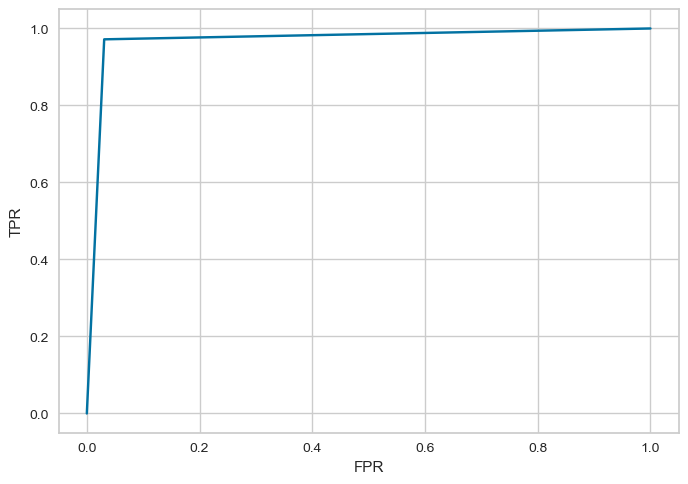

In [183]:
fpr, tpr, _= roc_curve(y_train, y_rbft)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


Decision Tree

In [184]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

In [186]:
y_tree= tree.predict(X_test)

In [187]:
print(classification_report(y_test, y_tree))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       144
           1       0.96      1.00      0.98       128

    accuracy                           0.98       272
   macro avg       0.98      0.98      0.98       272
weighted avg       0.98      0.98      0.98       272



In [188]:
decision_tree= accuracy_score(y_test, y_tree)
print('Decision Tree: ', decision_tree)

Decision Tree:  0.9779411764705882


In [189]:
confusion_matrix(y_test, y_tree)

array([[138,   6],
       [  0, 128]], dtype=int64)

In [190]:
roc_auc_score(y_test, y_tree)

0.9791666666666667

Text(0, 0.5, 'TPR')

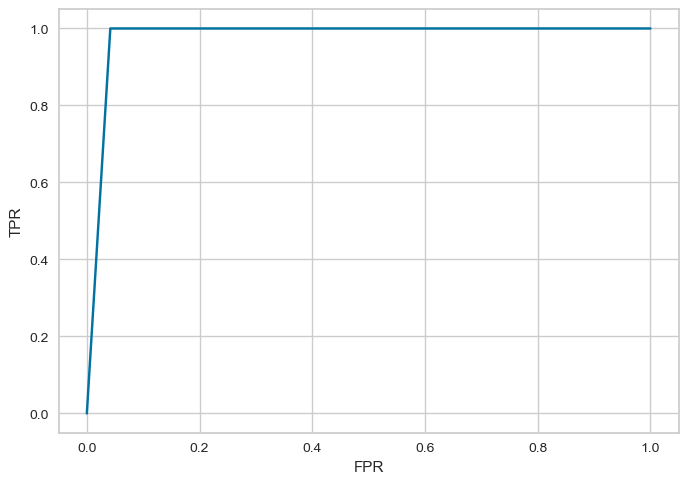

In [191]:
fpr, tpr,_ = roc_curve(y_test, y_tree)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [192]:
y_treet= tree.predict(X_train)

In [193]:
print(classification_report(y_train, y_treet))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       552
           1       1.00      1.00      1.00       532

    accuracy                           1.00      1084
   macro avg       1.00      1.00      1.00      1084
weighted avg       1.00      1.00      1.00      1084



In [194]:
accuracy_score(y_train, y_treet)

1.0

In [195]:
confusion_matrix(y_train, y_treet)

array([[552,   0],
       [  0, 532]], dtype=int64)

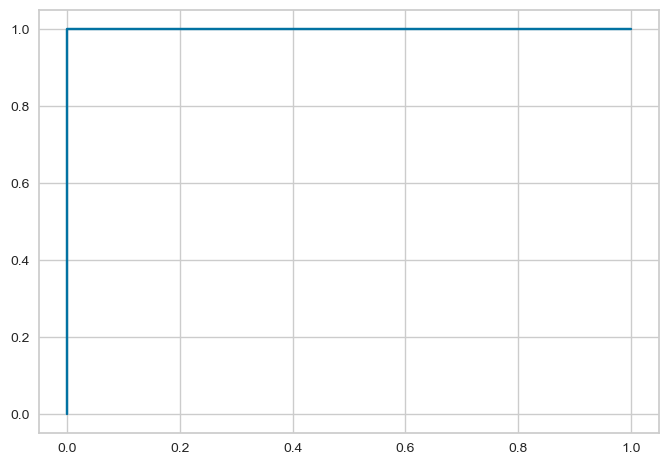

In [196]:
fpr, tpr, _= roc_curve(y_train, y_treet)
plt.plot(fpr, tpr)

In [197]:
roc_auc_score(y_train, y_treet)

1.0


Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
forest= RandomForestClassifier()

In [200]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [201]:
y_forest= forest.predict(X_test)

In [202]:
print(classification_report(y_test, y_forest))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       144
           1       0.96      0.99      0.98       128

    accuracy                           0.98       272
   macro avg       0.98      0.98      0.98       272
weighted avg       0.98      0.98      0.98       272



In [203]:
random_forest = accuracy_score(y_test, y_forest)
print('Random Forest: ', random_forest)

Random Forest:  0.9779411764705882


In [204]:
confusion_matrix(y_test, y_forest)

array([[139,   5],
       [  1, 127]], dtype=int64)

In [205]:
roc_auc_score(y_test, y_forest)

0.978732638888889

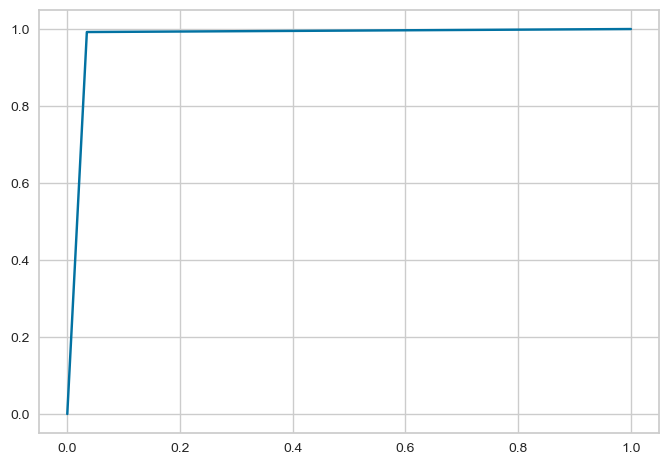

In [206]:
fpr, tpr, _= roc_curve(y_test, y_forest)
plt.plot(fpr, tpr)

In [207]:
y_forestt= forest.predict(X_train)

In [208]:
print(classification_report(y_train, y_forestt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       552
           1       1.00      1.00      1.00       532

    accuracy                           1.00      1084
   macro avg       1.00      1.00      1.00      1084
weighted avg       1.00      1.00      1.00      1084



In [209]:
confusion_matrix(y_train, y_forestt)

array([[552,   0],
       [  0, 532]], dtype=int64)


Model Comparision

In [210]:
print('Logistic Regession: ', Logistic)
print('SVM :', SVM)
print('SVM Modle with RBF Kernel: ', svm_rbf)
print('Decision Tree: ', decision_tree)
print('Random Forest: ', random_forest)

Logistic Regession:  0.8713235294117647
SVM : 0.9154411764705882
SVM Modle with RBF Kernel:  0.9154411764705882
Decision Tree:  0.9779411764705882
Random Forest:  0.9779411764705882


In [211]:
!pip install pycaret

In [212]:
import pycaret

In [213]:
from pycaret.classification import *

s= setup(df, target = 'Failure Type', session_id = 42, data_split_stratify=True)

,Description,Value
0,Session id,42
1,Target,Failure Type
2,Target type,Multiclass
3,Target mapping,"Heat Dissipation Failure: 0, No Failure: 1, Overstrain Failure: 2, Power Failure: 3, Tool Wear Failure: 4"
4,Original data shape,"(1356, 21)"
5,Transformed data shape,"(1356, 23)"
6,Transformed train set shape,"(949, 23)"
7,Transformed test set shape,"(407, 23)"
8,Numeric features,18
9,Categorical features,2


In [214]:
# Identify the top-performing model based on the Area Under the Curve (AUC) metric
best_model = compare_models(sort='AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9526,0.9991,0.9526,0.9593,0.9505,0.9285,0.9307,0.1180
et,Extra Trees Classifier,0.9326,0.9982,0.9326,0.9543,0.9339,0.8999,0.9042,0.0860
nb,Naive Bayes,0.9294,0.9948,0.9294,0.9432,0.9288,0.8950,0.8976,0.0340
lightgbm,Light Gradient Boosting Machine,0.8472,0.9939,0.8472,0.8790,0.8327,0.7550,0.7764,0.3470
xgboost,Extreme Gradient Boosting,0.8736,0.9937,0.8736,0.8906,0.8630,0.8035,0.8137,0.0810
dt,Decision Tree Classifier,0.8494,0.9149,0.8494,0.9353,0.8561,0.7774,0.7969,0.0330
knn,K Neighbors Classifier,0.5406,0.7407,0.5406,0.5246,0.5089,0.2636,0.2728,0.0650
dummy,Dummy Classifier,0.5132,0.5000,0.5132,0.2634,0.3481,0.0000,0.0000,0.0370
lr,Logistic Regression,0.8441,0.0000,0.8441,0.8497,0.8429,0.7697,0.7714,1.1640
svm,SVM - Linear Kernel,0.5037,0.0000,0.5037,0.4853,0.4464,0.2698,0.3134,0.0420


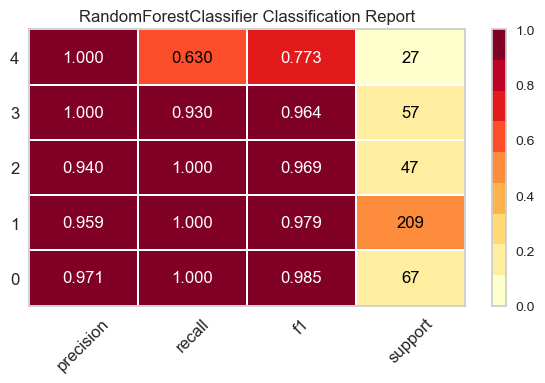

In [215]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

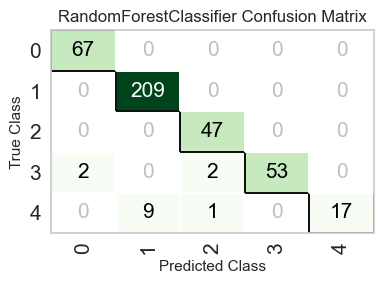

In [216]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

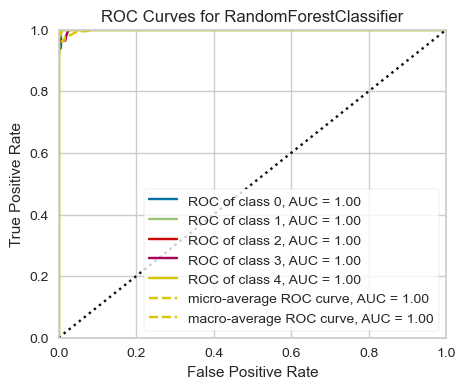

In [217]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

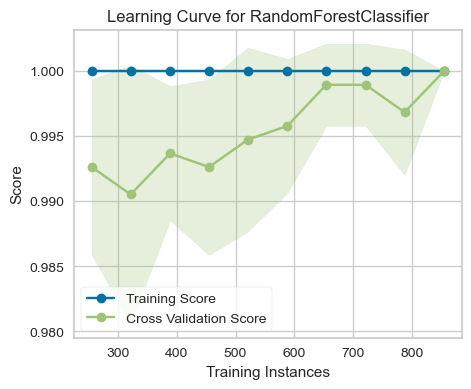

In [218]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'learning')

In [219]:
# Custom cost-benefit scoring function
def custom_cost_benefit(y_true, y_pred):
    maintenance_cost = 2050
    failure_cost = 10300
    tp = np.where((y_pred==1) & (y_true==1), failure_cost-maintenance_cost, 0)
    fp = np.where((y_pred==1) & (y_true==0), -maintenance_cost, 0)
    
    # Negative score because PyCaret optimizes for higher values, we want to minimize cost
    score = np.sum([fp, tp])
    return score

# Add custom cost-benefit metric to PyCaret
add_metric('cost_benefit', 'Cost-Benefit', custom_cost_benefit)

Name                                                      Cost-Benefit
Display Name                                              Cost-Benefit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(custom_cost_benefit, response_meth...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: cost_benefit, dtype: object

In [220]:
best_model = compare_models(sort = 'Cost-Benefit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Cost-Benefit,TT (Sec)
lr,Logistic Regression,0.8441,0.0000,0.8441,0.8497,0.8429,0.7697,0.7714,0.0000,0.1250
knn,K Neighbors Classifier,0.5406,0.7407,0.5406,0.5246,0.5089,0.2636,0.2728,0.0000,0.0580
nb,Naive Bayes,0.9294,0.9948,0.9294,0.9432,0.9288,0.8950,0.8976,0.0000,0.0350
dt,Decision Tree Classifier,0.8494,0.9149,0.8494,0.9353,0.8561,0.7774,0.7969,0.0000,0.0340
svm,SVM - Linear Kernel,0.5037,0.0000,0.5037,0.4853,0.4464,0.2698,0.3134,0.0000,0.0410
ridge,Ridge Classifier,0.9431,0.0000,0.9431,0.9537,0.9411,0.9148,0.9175,0.0000,0.0370
rf,Random Forest Classifier,0.9526,0.9991,0.9526,0.9593,0.9505,0.9285,0.9307,0.0000,0.1140
qda,Quadratic Discriminant Analysis,0.7809,0.0000,0.7809,0.8095,0.7657,0.6763,0.6940,0.0000,0.0340
ada,Ada Boost Classifier,0.7946,0.0000,0.7946,0.8022,0.7663,0.6932,0.7276,0.0000,0.0860
gbc,Gradient Boosting Classifier,0.8040,0.0000,0.8040,0.8588,0.7904,0.6718,0.7127,0.0000,0.6670


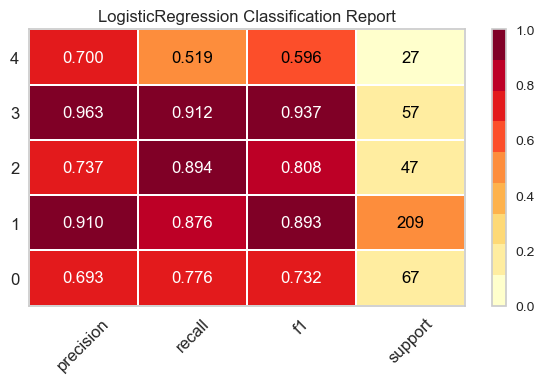

In [221]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

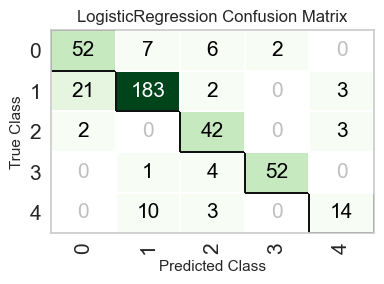

In [222]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

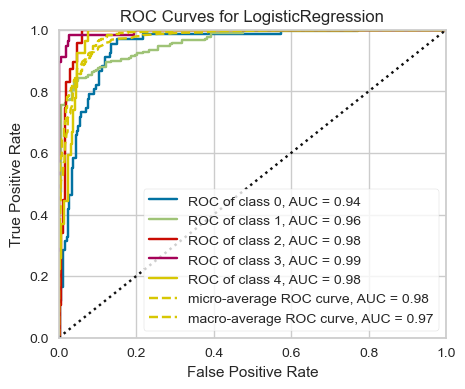

In [223]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

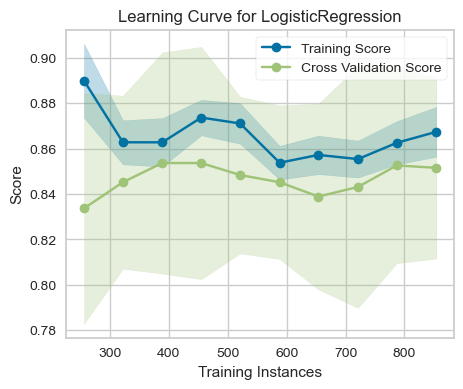

In [224]:
plt.figure(figsize = (5, 4))
plot_model(best_model, plot = 'learning')